# Чтение данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import lightgbm as lgbm

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

train = pd.read_csv("data/train.tsv.zip")
test = pd.read_csv("data/test.tsv")
sample_submission = pd.read_csv("data/sample_submission.tsv")

In [3]:
train['is_train']=1
test['is_train']=0
full_data = pd.concat([train.reset_index(),test.reset_index()], axis=0, sort=False).drop(['index'], axis=1)
full_data.rename({'y':'y_orig'}, axis=1, inplace=True)
full_data.reset_index(inplace=True)
full_data.drop('index', axis=1, inplace=True)
full_data.shape

(74473, 67)

In [4]:
full_data['y'] = np.log(full_data['y_orig'])

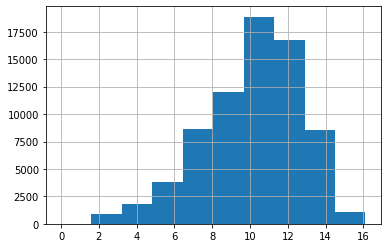

In [5]:
full_data['y'].hist()
plt.show()

# Генерация фичей
## Смотрим на сырые

In [10]:
explore_data = full_data[full_data['is_train']==1].drop(['y_orig'], axis=1)
reg_explore = lgbm.LGBMRegressor(n_estimators=500)
reg_explore.fit(explore_data.drop('y', axis=1), explore_data['y'])
sorted([[i,c] for i,c in zip(reg_explore.feature_importances_, explore_data.drop(['y'], axis=1).columns)], key=lambda x: x[0], reverse=True)

[[2264, 'week'],
 [1531, 'item_id'],
 [1373, 'Num'],
 [1227, 'f30'],
 [670, 'f29'],
 [579, 'f28'],
 [511, 'f27'],
 [401, 'f26'],
 [384, 'f25'],
 [355, 'f24'],
 [316, 'f21'],
 [304, 'shift'],
 [290, 'f23'],
 [287, 'f22'],
 [281, 'f17'],
 [272, 'f1'],
 [258, 'f13'],
 [247, 'f20'],
 [241, 'f8'],
 [234, 'f12'],
 [229, 'f16'],
 [228, 'f2'],
 [226, 'f18'],
 [222, 'f5'],
 [220, 'f19'],
 [219, 'f4'],
 [215, 'f11'],
 [214, 'f9'],
 [212, 'f15'],
 [211, 'f6'],
 [210, 'f14'],
 [187, 'f3'],
 [187, 'f7'],
 [171, 'f10'],
 [24, 'year'],
 [0, 'f31'],
 [0, 'f32'],
 [0, 'f33'],
 [0, 'f34'],
 [0, 'f35'],
 [0, 'f36'],
 [0, 'f37'],
 [0, 'f38'],
 [0, 'f39'],
 [0, 'f40'],
 [0, 'f41'],
 [0, 'f42'],
 [0, 'f43'],
 [0, 'f44'],
 [0, 'f45'],
 [0, 'f46'],
 [0, 'f47'],
 [0, 'f48'],
 [0, 'f49'],
 [0, 'f50'],
 [0, 'f51'],
 [0, 'f52'],
 [0, 'f53'],
 [0, 'f54'],
 [0, 'f55'],
 [0, 'f56'],
 [0, 'f57'],
 [0, 'f58'],
 [0, 'f59'],
 [0, 'f60'],
 [0, 'is_train']]

## f30

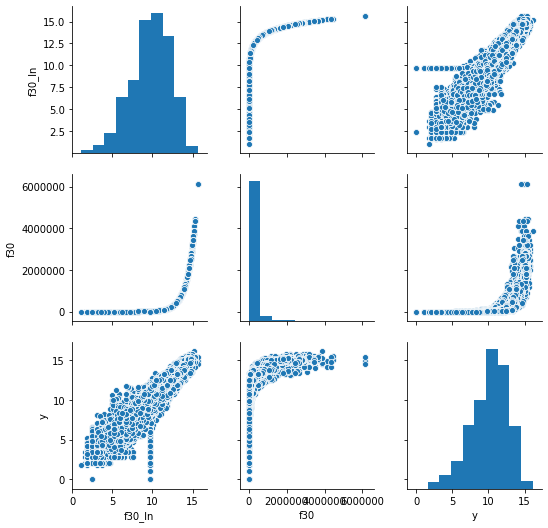

In [11]:
def process_f30(dataset):
    dataset['f30_ln'] = np.log1p(dataset['f30'])
    f30_ln_mean = dataset.loc[dataset['f30_ln']>0,'f30_ln'].mean()
    dataset.loc[dataset['f30_ln']==0,'f30_ln'] = f30_ln_mean
    #dataset.loc[dataset['f30_ln']==0, 'f30_ln']=-1000

process_f30(explore_data)

sns.pairplot(explore_data[['f30_ln', 'f30', 'y']])
plt.show()

## f2

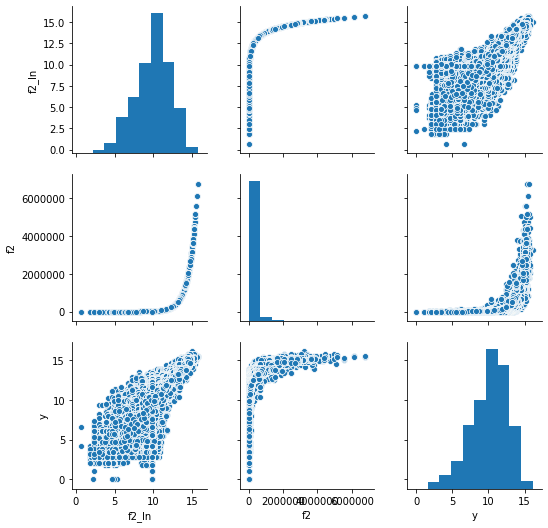

In [12]:
def process_f2(dataset):
    dataset['f2_ln'] = np.log1p(dataset['f2'])
    f2_ln_mean = dataset.loc[dataset['f2_ln']>0,'f2_ln'].mean()
    dataset.loc[dataset['f2_ln']==0,'f2_ln'] = f2_ln_mean
    #dataset.loc[dataset['f30_ln']==0, 'f30_ln']=-1000

process_f2(explore_data)

sns.pairplot(explore_data[['f2_ln', 'f2', 'y']])
plt.show()

## f1

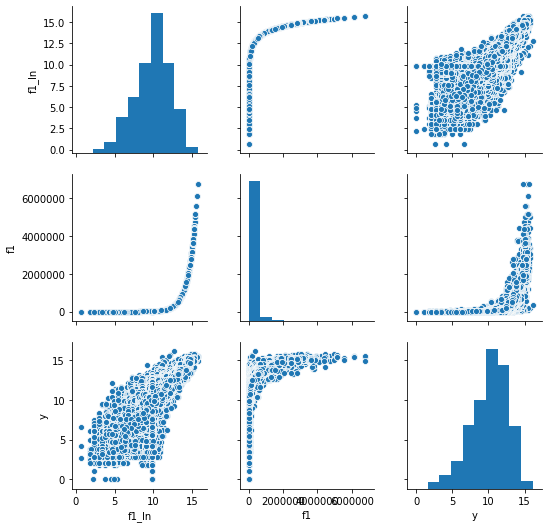

In [13]:
def process_f1(dataset):
    dataset['f1_ln'] = np.log1p(dataset['f1'])
    f1_ln_mean = dataset.loc[dataset['f1_ln']>0,'f1_ln'].mean()
    dataset.loc[dataset['f1_ln']==0,'f1_ln'] = f1_ln_mean
    #dataset.loc[dataset['f30_ln']==0, 'f30_ln']=-1000

process_f1(explore_data)

sns.pairplot(explore_data[['f1_ln', 'f1', 'y']])
plt.show()

## F3

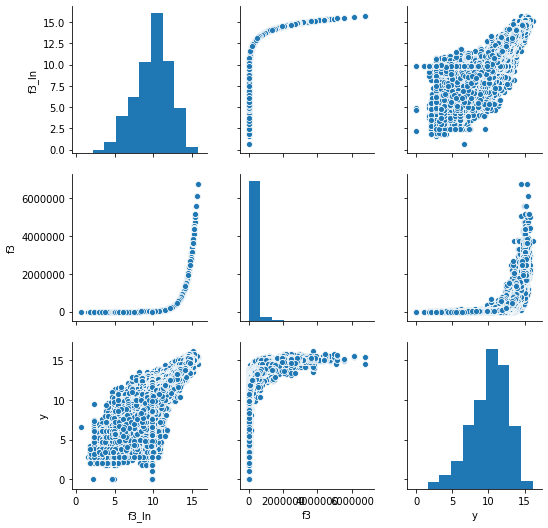

In [14]:
def process_f3(dataset):
    dataset['f3_ln'] = np.log1p(dataset['f3'])
    f3_ln_mean = dataset.loc[dataset['f3_ln']>0,'f3_ln'].mean()
    dataset.loc[dataset['f3_ln']==0,'f3_ln'] = f3_ln_mean
    #dataset.loc[dataset['f30_ln']==0, 'f30_ln']=-1000

process_f3(explore_data)

sns.pairplot(explore_data[['f3_ln', 'f3', 'y']])
plt.show()

## ItemID

In [47]:
explore_data['item_id_new'] = explore_data['item_id'].apply(lambda x: x-20400000)

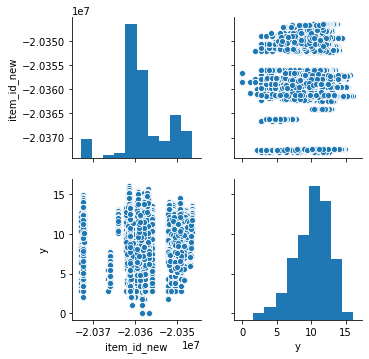

In [49]:
sns.pairplot(explore_data[['item_id_new', 'y']])
plt.show()

# Линейная модель

In [15]:
linear_features = ['f30_ln']

In [16]:
explore_data[linear_features].corr()

,f30_ln
f30_ln,1.0


In [23]:
import statsmodels.api as sm

linear_model = sm.OLS(explore_data['y'], sm.add_constant(explore_data[linear_features]), hasconst=True)
fitted_linear_model = linear_model.fit()

In [24]:
fitted_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                 5.122e+05
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:59:00   Log-Likelihood:                -95640.
No. Observations:               72457   AIC:                         1.913e+05
Df Residuals:                   72455   BIC:                         1.913e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5152      0.014     37.290      0.000       0.488       0.542
f30_ln         0.9852      0.001    715.672      0.000       0.982       0.988
==============================================================================
Omnibus:                    72242.890   Durbin-Watson:                   1.586
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4468083.057
Skew:                          -4.932   Prob(JB):                         0.00
Kurtosis:                      40.184   Cond. No.                         41.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
def smape(f,a):
    top = np.fabs(f-a)
    bot = (np.fabs(f) + np.fabs(a))/2
    return 100/len(a) * np.sum(top/bot)

In [27]:
smape(np.exp(fitted_linear_model.predict(sm.add_constant(explore_data[linear_features]))), np.exp(explore_data['y']))

37.241505246268176

In [29]:
np.exp(fitted_linear_model.predict(sm.add_constant(explore_data[linear_features])))

0        6.461393e+04
1        3.346612e+04
2        5.232669e+04
3        1.407425e+04
4        3.146575e+04
5        1.100945e+04
6        1.912257e+04
7        2.803485e+04
8        3.233750e+04
9        2.259333e+04
10       6.343321e+04
11       2.040172e+02
12       1.347723e+02
13       1.732942e+02
14       1.408418e+03
15       1.259255e+03
16       8.151037e+05
17       1.981888e+06
18       2.631643e+05
19       5.608242e+03
20       6.229599e+03
21       4.710832e+04
22       1.777142e+01
23       2.447316e+04
24       2.087692e+04
25       2.099142e+04
26       5.032874e+04
27       4.041073e+04
28       7.263167e+03
29       2.652636e+02
             ...     
72427    6.496072e+01
72428    6.583230e+04
72429    6.633121e+03
72430    6.496072e+01
72431    2.958036e+02
72432    2.447316e+04
72433    1.270494e+02
72434    3.360389e+01
72435    2.952468e+04
72436    1.652846e+05
72437    7.397403e+04
72438    1.363564e+05
72439    7.642539e+03
72440    5.916054e+02
72441    9

In [106]:
np.exp(explore_data['y'])

0        123438.0
1         58410.0
2        163930.0
3         53902.0
4        105970.0
           ...   
72452     18978.0
72453     18236.0
72454       542.0
72455      4181.0
72456        16.0
Name: y, Length: 72457, dtype: float64

# Разбиение на подвыборки

In [32]:
full_data['date_econoded'] = full_data['year']*100 + full_data['week']
dates = sorted(full_data['date_econoded'].unique())
len(dates)

111



for n in range(60, 108, 8):
    dev_dates = dates[:n]
    valid_dates = dates[n:n+3]

    dev = full_data[(full_data['is_train']==1) & (full_data['date_econoded'].isin(dev_dates))]
    valid = full_data[(full_data['is_train']==1) & (full_data['date_econoded'].isin(valid_dates))]
    
    dev_y = dev[['y']]
    dev_X = dev.drop(['y', 'is_train' ],axis=1)
    
    valid_y = valid[['y', 'y_orig']]
    valid_X = valid.drop(['y', 'is_train'],axis=1)
    
    

In [33]:
dev = full_data.loc[(full_data['date_econoded']<=201406) & (full_data['is_train']==1)]
valid = full_data.loc[(full_data['date_econoded']>201406) & (full_data['is_train']==1)]

In [34]:
dev_y = dev[['y', 'y_orig']]
dev_X = dev.drop(['y', 'is_train', 'y_orig' ],axis=1)

valid_y = valid[['y', 'y_orig']]
valid_X = valid.drop(['y', 'is_train', 'y_orig'],axis=1)

In [35]:
full_train_X = full_data.loc[(full_data['is_train']==1)].drop(['y', 'is_train', 'y_orig'], axis=1)
full_train_y = full_data.loc[(full_data['is_train']==1)][['y', 'y_orig']]

In [36]:
test_X = full_data.loc[full_data['is_train']==0].drop(['y', 'is_train', 'y_orig'], axis=1)

# Построение модели

In [37]:
import lightgbm as lgbm
import numpy as np
from sklearn.metrics import mean_absolute_error

In [38]:
def smape(f,a):
    top = np.fabs(f-a)
    bot = (np.fabs(f) + np.fabs(a))/2
    return 100/len(a) * np.sum(top/bot)

def smape_scorer(estimator, X,y):
    y_predicted = estimator.predict(X)
    return smape(y_predicted, y)

In [39]:
reg = lgbm.LGBMRegressor(n_estimators=250, learning_rate=0.05, max_depth=3)
reg.fit(dev_X, dev_y['y'])

dev_predicted = np.exp(reg.predict(dev_X))
dev_smape = smape(dev_predicted, dev_y['y_orig'])
    
valid_predicted = np.exp(reg.predict(valid_X))
valid_smape = smape(valid_predicted, valid_y['y_orig'])

print(dev_smape, valid_smape)

22.867508921800855 26.858419827513316


In [40]:
[[i,c] for i,c in zip(reg.feature_importances_, dev_X.columns)]

[[100, 'Num'],
 [0, 'year'],
 [404, 'week'],
 [2, 'shift'],
 [125, 'item_id'],
 [25, 'f1'],
 [13, 'f2'],
 [7, 'f3'],
 [14, 'f4'],
 [4, 'f5'],
 [2, 'f6'],
 [6, 'f7'],
 [6, 'f8'],
 [11, 'f9'],
 [15, 'f10'],
 [6, 'f11'],
 [2, 'f12'],
 [2, 'f13'],
 [14, 'f14'],
 [8, 'f15'],
 [7, 'f16'],
 [10, 'f17'],
 [31, 'f18'],
 [16, 'f19'],
 [17, 'f20'],
 [6, 'f21'],
 [13, 'f22'],
 [23, 'f23'],
 [18, 'f24'],
 [22, 'f25'],
 [21, 'f26'],
 [120, 'f27'],
 [105, 'f28'],
 [109, 'f29'],
 [248, 'f30'],
 [0, 'f31'],
 [0, 'f32'],
 [0, 'f33'],
 [0, 'f34'],
 [0, 'f35'],
 [0, 'f36'],
 [0, 'f37'],
 [0, 'f38'],
 [0, 'f39'],
 [0, 'f40'],
 [0, 'f41'],
 [0, 'f42'],
 [0, 'f43'],
 [0, 'f44'],
 [0, 'f45'],
 [0, 'f46'],
 [0, 'f47'],
 [0, 'f48'],
 [0, 'f49'],
 [0, 'f50'],
 [0, 'f51'],
 [0, 'f52'],
 [0, 'f53'],
 [0, 'f54'],
 [0, 'f55'],
 [0, 'f56'],
 [0, 'f57'],
 [0, 'f58'],
 [0, 'f59'],
 [0, 'f60'],
 [190, 'date_econoded']]

In [ ]:
n_estimators_row = [27, 29, 30]
results=list()

for n_estimators_ in n_estimators_row:
    reg = lgbm.LGBMRegressor(n_estimators=n_estimators_)
    reg.fit(dev_X, dev_y['y'])
    
    dev_predicted = np.exp(reg.predict(dev_X))
    dev_smape = smape(dev_predicted, dev_y['y_orig'])
    
    valid_predicted = np.exp(reg.predict(valid_X))
    valid_smape = smape(valid_predicted, valid_y['y_orig'])
    
    results.append([[n_estimators_], dev_smape, valid_smape])
    
results

In [ ]:
dev_predicted

In [ ]:
reg = lgbm.LGBMRegressor(n_estimators=30)
reg.fit(full_train_X, full_train_y['y'])
full_train_predicted=reg.predict(full_train_X)

# Test

In [ ]:
test_predicted=reg.predict(test_X)

In [ ]:
np.exp(test_predicted)

In [ ]:
full_test = test_X.copy()
full_test['y'] = np.exp(test_predicted)

In [ ]:
mean_prediction = full_test[['year', 'week', 'y', 'item_id']].groupby(['year', 'week', 'item_id'], as_index=False).agg({'y':'mean'})

In [ ]:
test_boosting= pd.merge(left=test[['Num', 'year', 'week', 'item_id']], right=mean_prediction, how='left')

In [ ]:
test_boosting['y_boosted'] = full_test['y']

In [ ]:
full_test.loc[(full_test['item_id']==20447918) & (full_test['year']==2015) & (full_test['week']==3), 'y']

In [ ]:
test_boosting[(test_boosting['item_id']==20447918) & (test_boosting['year']==2015) & (test_boosting['week']==3)]

In [ ]:
test_boosting.to_csv('predictions/boosting_full_output.csv', index=False)

In [ ]:
sample_submission['y']=np.exp(test_predicted)
sample_submission.head()

In [ ]:
sample_submission.to_csv('predictions/goosting.csv', index=False)